In [ ]:
# install requirements
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 1. Data Collecting

## Web-Crawling

In [1]:
!pip install requests #특정 URL로부터 HTML 문서를 가져오는 작업 수행
!pip install beautifulsoup4 #HTML 문서에서 데이터를 추출하는 작업 수행

In [111]:
import requests
from bs4 import BeautifulSoup

# Step 1: Specify the URL
url = 'https://n.news.naver.com/mnews/article/025/0003396529'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content with BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the article container
    article_container = soup.find('div', id='newsct_article')

    if article_container:
        # Extract the article text
        paragraphs = article_container.find_all('article', id='dic_area')
        article_text = ''

        # Loop through each paragraph and get the text
        for paragraph in paragraphs:
            article_text += paragraph.get_text(separator='\n').strip() + '\n'

        # Save the article text to a file
        with open('crawled_article.txt', 'w', encoding='utf-8') as file:
            file.write(article_text)

        print("Article extracted and saved to crawled_article.txt")
    else:
        print("Article container not found.")
else:
    print(f"Failed to retrieve the article. Status code: {response.status_code}")

Article extracted and saved to crawled_article.txt


## Extract Text from PDF

In [11]:
pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 23.6 MB/s eta 0:00:00


In [13]:
import fitz  # PyMuPDF의 별칭

def extract_text_from_pdf(file_path):
    text = ""
    with fitz.open(file_path) as pdf:
        for page_num in range(len(pdf)):
            page = pdf[page_num]
            text += page.get_text()
    return text

def save_text_to_file(text, output_file):
    with open(output_file, "w", encoding="utf-8") as file:
        file.write(text)

# 사용 예시
file_path = "2023_POSCO_ESG_Report.pdf"
pdf_text = extract_text_from_pdf(file_path)
save_text_to_file(pdf_text, "output.txt")

# 데이터 전처리

In [61]:
sample_text = " 안녕하세요! 오늘은 날씨가 정말 좋습니다. 하늘은 맑고 기온도 적당해서 외출하기에 딱 좋은 날이에요. 저는 요즘 데이터 사이언스와 머신러닝에 푹 빠져 있습니다. 다양한 알고리즘을 공부하고 실제 데이터로 실습을 해보며 많은 것을 배우고 있어요. 정말 재미있답니다! ㅎㅎㅎ 여러분은 어떤 것에 관심이 있으신가요? 혹시 저와 같은 분야에 관심이 있으시다면 함께 이야기해봐요. 서로의 경험을 공유하면서 더 나은 방향으로 나아갈 수 있을 것 같아요. 이 글을 읽고 계신 여러분도 유익한 하루 보내세요! ^^ 또 다른 흥미로운 주제로 대화할 기회가 있기를 바랍니다."

## 불필요한 문자 및 특수 문자 제거

In [28]:
import re

def clean_text(text):
    text = re.sub(r"<[^>]+>", "", text)  # HTML 태그 제거
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # URL 제거
    text = re.sub(r"\S+@\S+", "", text)  # 이메일 제거
    text = re.sub(r"[^가-힣a-zA-Z0-9\s]", "", text)  # 특수 문자 제거
    return text

In [29]:
clean_text(sample_text)

' 안녕하세요 오늘은 날씨가 정말 좋습니다 하늘은 맑고 기온도 적당해서 외출하기에 딱 좋은 날이에요 저는 요즘 데이터 사이언스와 머신러닝에 푹 빠져 있습니다 다양한 알고리즘을 공부하고 실제 데이터로 실습을 해보며 많은 것을 배우고 있어요 정말 재미있답니다  여러분은 어떤 것에 관심이 있으신가요 혹시 저와 같은 분야에 관심이 있으시다면 함께 이야기해봐요 서로의 경험을 공유하면서 더 나은 방향으로 나아갈 수 있을 것 같아요 이 글을 읽고 계신 여러분도 유익한 하루 보내세요  또 다른 흥미로운 주제로 대화할 기회가 있기를 바랍니다'

## 정규화 (Normalization)

In [ ]:
!pip install soynlp

반복 문자나 특수한 텍스트를 정규화하여 표준 형태로 변환. SoyNLP 사용

In [30]:
from soynlp.normalizer import repeat_normalize

def normalize_text(text):
    return repeat_normalize(text, num_repeats=2)

In [31]:
normalize_text(sample_text)

'안녕하세요! 오늘은 날씨가 정말 좋습니다. 하늘은 맑고 기온도 적당해서 외출하기에 딱 좋은 날이에요. 저는 요즘 데이터 사이언스와 머신러닝에 푹 빠져 있습니다. 다양한 알고리즘을 공부하고 실제 데이터로 실습을 해보며 많은 것을 배우고 있어요. 정말 재미있답니다! ㅎㅎㅎ 여러분은 어떤 것에 관심이 있으신가요? 혹시 저와 같은 분야에 관심이 있으시다면 함께 이야기해봐요. 서로의 경험을 공유하면서 더 나은 방향으로 나아갈 수 있을 것 같아요. 이 글을 읽고 계신 여러분도 유익한 하루 보내세요! ^^ 또 다른 흥미로운 주제로 대화할 기회가 있기를 바랍니다.'

##문장 분리 (Sentence Segmentation)

In [45]:
pip install kss

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 50.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [46]:
import kss

def split_sentences(text):
    return kss.split_sentences(text)

## 토큰화 (Tokenization)

문장을 단어 단위로 분리하여 형태소 분석기를 통해 토큰화

In [34]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 28.5 MB/s eta 0:00:00


In [37]:
from konlpy.tag import Okt

okt = Okt()

def tokenize_text(text):
    return okt.morphs(text)


In [80]:
sample_text_processed = tokenize_text(sample_text)
sample_text_processed

['안녕하세요',
 '!',
 '오늘',
 '은',
 '날씨',
 '가',
 '정말',
 '좋습니다',
 '.',
 '하늘',
 '은',
 '맑고',
 '기온',
 '도',
 '적당해서',
 '외출',
 '하기에',
 '딱',
 '좋은',
 '날',
 '이에요',
 '.',
 '저',
 '는',
 '요즘',
 '데이터',
 '사이언스',
 '와',
 '머신',
 '러닝',
 '에',
 '푹',
 '빠져',
 '있습니다',
 '.',
 '다양한',
 '알고리즘',
 '을',
 '공부',
 '하고',
 '실제',
 '데이터',
 '로',
 '실습',
 '을',
 '해보며',
 '많은',
 '것',
 '을',
 '배우고',
 '있어요',
 '.',
 '정말',
 '재미있답니다',
 '!',
 'ㅎㅎㅎ',
 '여러분',
 '은',
 '어떤',
 '것',
 '에',
 '관심',
 '이',
 '있으신',
 '가요',
 '?',
 '혹시',
 '저',
 '와',
 '같은',
 '분야',
 '에',
 '관심',
 '이',
 '있으시다면',
 '함께',
 '이야기',
 '해봐요',
 '.',
 '서로',
 '의',
 '경험',
 '을',
 '공유',
 '하면서',
 '더',
 '나은',
 '방향',
 '으로',
 '나아갈',
 '수',
 '있을',
 '것',
 '같아요',
 '.',
 '이',
 '글',
 '을',
 '읽고',
 '계신',
 '여러분',
 '도',
 '유익한',
 '하루',
 '보내세요',
 '!',
 '^^',
 '또',
 '다른',
 '흥미로운',
 '주제',
 '로',
 '대화',
 '할',
 '기회',
 '가',
 '있기를',
 '바랍니다',
 '.']

## 불용어 제거 (Stopwords Removal)

한국어에서 자주 쓰이지만 의미를 갖지 않는 불용어(은, 는, 이, 가 등)를 제거

In [22]:
stopwords = ["은", "는", "이", "가", "도", "을", "를", "에", "의", "와", "으로", "그리고"]

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stopwords]


In [81]:
sample_text_processed = remove_stopwords(sample_text_processed)
sample_text_processed

['안녕하세요',
 '!',
 '오늘',
 '날씨',
 '정말',
 '좋습니다',
 '.',
 '하늘',
 '맑고',
 '기온',
 '적당해서',
 '외출',
 '하기에',
 '딱',
 '좋은',
 '날',
 '이에요',
 '.',
 '저',
 '요즘',
 '데이터',
 '사이언스',
 '머신',
 '러닝',
 '푹',
 '빠져',
 '있습니다',
 '.',
 '다양한',
 '알고리즘',
 '공부',
 '하고',
 '실제',
 '데이터',
 '로',
 '실습',
 '해보며',
 '많은',
 '것',
 '배우고',
 '있어요',
 '.',
 '정말',
 '재미있답니다',
 '!',
 'ㅎㅎㅎ',
 '여러분',
 '어떤',
 '것',
 '관심',
 '있으신',
 '가요',
 '?',
 '혹시',
 '저',
 '같은',
 '분야',
 '관심',
 '있으시다면',
 '함께',
 '이야기',
 '해봐요',
 '.',
 '서로',
 '경험',
 '공유',
 '하면서',
 '더',
 '나은',
 '방향',
 '나아갈',
 '수',
 '있을',
 '것',
 '같아요',
 '.',
 '글',
 '읽고',
 '계신',
 '여러분',
 '유익한',
 '하루',
 '보내세요',
 '!',
 '^^',
 '또',
 '다른',
 '흥미로운',
 '주제',
 '로',
 '대화',
 '할',
 '기회',
 '있기를',
 '바랍니다',
 '.']

## 형태소 분석 및 품사 태깅 (POS Tagging) & 어간 추출 (Stemming)

각 단어에 품사 태그를 부여하여 후에 필요한 품사를 사용할 수 있게. stem = True 기능으로 어간 추출도 동시 진행.


In [89]:
def pos_tagging(tokens):
    return okt.pos(" ".join(tokens), stem = True)

In [82]:
sample_text_processed = pos_tagging(sample_text_processed)
sample_text_processed

[('안녕하세요', 'Adjective'),
 ('!', 'Punctuation'),
 ('오늘', 'Noun'),
 ('날씨', 'Noun'),
 ('정말', 'Noun'),
 ('좋습니다', 'Adjective'),
 ('.', 'Punctuation'),
 ('하늘', 'Noun'),
 ('맑고', 'Adjective'),
 ('기온', 'Noun'),
 ('적당해서', 'Adjective'),
 ('외출', 'Noun'),
 ('하기에', 'Verb'),
 ('딱', 'Adverb'),
 ('좋은', 'Adjective'),
 ('날', 'Noun'),
 ('이에요', 'Josa'),
 ('.', 'Punctuation'),
 ('저', 'Noun'),
 ('요즘', 'Noun'),
 ('데이터', 'Noun'),
 ('사이언스', 'Noun'),
 ('머신', 'Noun'),
 ('러닝', 'Noun'),
 ('푹', 'Noun'),
 ('빠져', 'Verb'),
 ('있습니다', 'Adjective'),
 ('.', 'Punctuation'),
 ('다양한', 'Adjective'),
 ('알고리즘', 'Noun'),
 ('공부', 'Noun'),
 ('하고', 'Verb'),
 ('실제', 'Noun'),
 ('데이터', 'Noun'),
 ('로', 'Noun'),
 ('실습', 'Noun'),
 ('해보며', 'Verb'),
 ('많은', 'Adjective'),
 ('것', 'Noun'),
 ('배우고', 'Verb'),
 ('있어요', 'Adjective'),
 ('.', 'Punctuation'),
 ('정말', 'Noun'),
 ('재미있답니다', 'Adjective'),
 ('!', 'Punctuation'),
 ('ㅎㅎㅎ', 'KoreanParticle'),
 ('여러분', 'Noun'),
 ('어떤', 'Adjective'),
 ('것', 'Noun'),
 ('관심', 'Noun'),
 ('있으신', 'Adjective'),
 ('가

필요한 품사만 사용



In [87]:
def stem_tokens(tokens):
    stemmed_words = []
    # Use okt.pos() to get the tagged words with their POS
    #pos_tags = okt.pos(" ".join(tokens), stem=True)  # Get the POS tagging with stemming

    for word, tag in tokens:  # Correctly unpack the tuple
        if tag in ["Noun", "Verb", "Adjective"]:  # Check if the tag is one of the desired ones
            stemmed_words.append(word)  # Append the stemmed word to the list

    return stemmed_words


In [88]:
sample_text_processed = stem_tokens(sample_text_processed)
sample_text_processed

['안녕하세요',
 '오늘',
 '날씨',
 '정말',
 '좋습니다',
 '하늘',
 '맑고',
 '기온',
 '적당해서',
 '외출',
 '하기에',
 '좋은',
 '날',
 '저',
 '요즘',
 '데이터',
 '사이언스',
 '머신',
 '러닝',
 '푹',
 '빠져',
 '있습니다',
 '다양한',
 '알고리즘',
 '공부',
 '하고',
 '실제',
 '데이터',
 '로',
 '실습',
 '해보며',
 '많은',
 '것',
 '배우고',
 '있어요',
 '정말',
 '재미있답니다',
 '여러분',
 '어떤',
 '것',
 '관심',
 '있으신',
 '가요',
 '혹시',
 '저',
 '같은',
 '분야',
 '관심',
 '있으시다면',
 '이야기',
 '해봐요',
 '서로',
 '경험',
 '공유',
 '하면서',
 '더',
 '나은',
 '방향',
 '나아갈',
 '수',
 '있을',
 '것',
 '같아요',
 '글',
 '읽고',
 '계신',
 '여러분',
 '유익한',
 '하루',
 '보내세요',
 '또',
 '다른',
 '흥미로운',
 '주제',
 '로',
 '대화',
 '할',
 '기회',
 '있기를',
 '바랍니다']

## 함수 합치기

In [99]:
def preprocess_korean_text(text):
    # 1. 클렌징
    text = clean_text(text)
    # 2. 정규화
    text = normalize_text(text)
    # 3. 문장 분리
    sentences = split_sentences(text)
    #print("this is sentences:", sentences)

    processed_tokens = []
    for sentence in sentences:
        # 4. 토큰화
        tokens = tokenize_text(sentence)
        #print("this is tokens:",tokens)
        # 5. 불용어 제거
        tokens = remove_stopwords(tokens)
        # 6. 형태소 분석 및 품사 태깅
        tokens = pos_tagging(tokens)
        # 7. 어간 추출
        tokens = stem_tokens(tokens)

        processed_tokens.extend(tokens)

    return processed_tokens


In [98]:
preprocess_korean_text(sample_text)

this is sentences: ['안녕하세요', '오늘은 날씨가 정말 좋습니다', '하늘은 맑고 기온도 적당해서 외출하기에 딱 좋은 날이에요', '저는 요즘 데이터 사이언스와 머신러닝에 푹 빠져 있습니다', '다양한 알고리즘을 공부하고 실제 데이터로 실습을 해보며 많은 것을 배우고 있어요', '정말 재미있답니다', '여러분은 어떤 것에 관심이 있으신가요 혹시 저와 같은 분야에 관심이 있으시다면 함께 이야기해봐요', '서로의 경험을 공유하면서 더 나은 방향으로 나아갈 수 있을 것 같아요', '이 글을 읽고 계신 여러분도 유익한 하루 보내세요', '또 다른 흥미로운 주제로 대화할 기회가 있기를 바랍니다']
this is tokens: ['안녕하세요']
this is tokens: ['오늘', '은', '날씨', '가', '정말', '좋습니다']
this is tokens: ['하늘', '은', '맑고', '기온', '도', '적당해서', '외출', '하기에', '딱', '좋은', '날', '이에요']
this is tokens: ['저', '는', '요즘', '데이터', '사이언스', '와', '머신', '러닝', '에', '푹', '빠져', '있습니다']
this is tokens: ['다양한', '알고리즘', '을', '공부', '하고', '실제', '데이터', '로', '실습', '을', '해보며', '많은', '것', '을', '배우고', '있어요']
this is tokens: ['정말', '재미있답니다']
this is tokens: ['여러분', '은', '어떤', '것', '에', '관심', '이', '있으신', '가요', '혹시', '저', '와', '같은', '분야', '에', '관심', '이', '있으시다면', '함께', '이야기', '해봐요']
this is tokens: ['서로', '의', '경험', '을', '공유', '하면서', '더', '나은', '방향', '으로', '나아갈', '수', '있을', '것', '같아요']
this 

['안녕하다',
 '오늘',
 '날씨',
 '정말',
 '좋다',
 '하늘',
 '맑다',
 '기온',
 '적당하다',
 '외출',
 '하다',
 '좋다',
 '날',
 '저',
 '요즘',
 '데이터',
 '사이언스',
 '머신',
 '러닝',
 '푹',
 '빠지다',
 '있다',
 '다양하다',
 '알고리즘',
 '공부',
 '하다',
 '실제',
 '데이터',
 '로',
 '실습',
 '해보다',
 '많다',
 '것',
 '배우다',
 '있다',
 '정말',
 '재미있다',
 '여러분',
 '어떻다',
 '것',
 '관심',
 '있다',
 '가요',
 '혹시',
 '저',
 '같다',
 '분야',
 '관심',
 '있다',
 '이야기',
 '해보다',
 '서로',
 '경험',
 '공유',
 '하다',
 '더',
 '나은',
 '방향',
 '나아가다',
 '수',
 '있다',
 '것',
 '같다',
 '글',
 '읽다',
 '계시다',
 '여러분',
 '유익하다',
 '하루',
 '보내다',
 '또',
 '다른',
 '흥미롭다',
 '주제',
 '로',
 '대화',
 '하다',
 '기회',
 '있다',
 '바라다']

# 3. Data Analysis

## Analysis Method 1: Word Cloud

In [105]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# 전처리 결과
words = preprocess_korean_text(sample_text)

# 단어 빈도 계산
word_counts = Counter(words)

In [101]:
word_counts

Counter({'안녕하다': 1,
         '오늘': 1,
         '날씨': 1,
         '정말': 2,
         '좋다': 2,
         '하늘': 1,
         '맑다': 1,
         '기온': 1,
         '적당하다': 1,
         '외출': 1,
         '하다': 4,
         '날': 1,
         '저': 2,
         '요즘': 1,
         '데이터': 2,
         '사이언스': 1,
         '머신': 1,
         '러닝': 1,
         '푹': 1,
         '빠지다': 1,
         '있다': 6,
         '다양하다': 1,
         '알고리즘': 1,
         '공부': 1,
         '실제': 1,
         '로': 2,
         '실습': 1,
         '해보다': 2,
         '많다': 1,
         '것': 3,
         '배우다': 1,
         '재미있다': 1,
         '여러분': 2,
         '어떻다': 1,
         '관심': 2,
         '가요': 1,
         '혹시': 1,
         '같다': 2,
         '분야': 1,
         '이야기': 1,
         '서로': 1,
         '경험': 1,
         '공유': 1,
         '더': 1,
         '나은': 1,
         '방향': 1,
         '나아가다': 1,
         '수': 1,
         '글': 1,
         '읽다': 1,
         '계시다': 1,
         '유익하다': 1,
         '하루': 1,
         '보내다': 1,
         '또

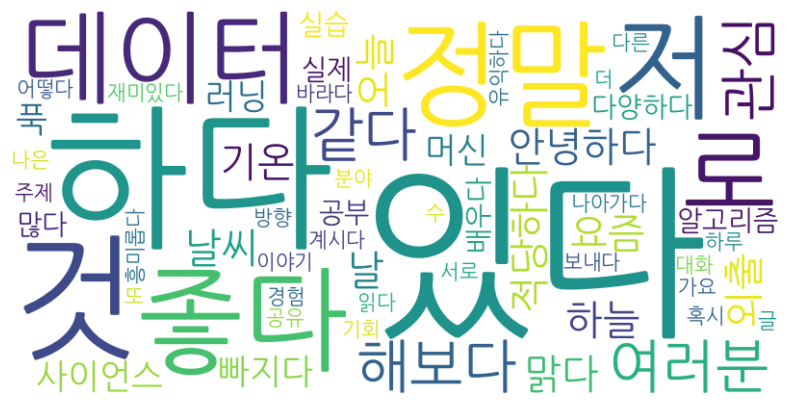

In [104]:
# 워드 클라우드 생성
wordcloud = WordCloud(font_path='NanumGothic.otf', width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# 결과 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

보고서 사용

In [106]:
with open('output.txt', 'r', encoding='utf-8') as file:
    report_text = file.read()

words = preprocess_korean_text(report_text)

# 단어 빈도 계산
word_counts = Counter(words)

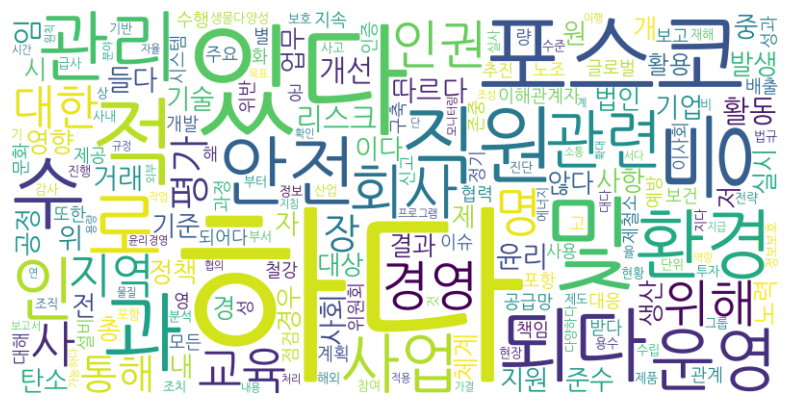

In [107]:
# 워드 클라우드 생성
wordcloud = WordCloud(font_path='NanumGothic.otf', width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# 결과 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

## Analysis Method 2: TF-IDF

In [ ]:
!pip install konlpy

In [ ]:
from konlpy.tag import Okt

okt = Okt()

In [ ]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = [
  '먹고 싶은 과일 사과', # document 1
  '먹고 싶은 과일 바나나', # document 2
  '길고 노란 바나나 바나나', # document 3
  '저는 과일 좋아요' # document 4
]

vocab = list(set(w for doc in docs for w in doc.split()))
#vocab.sort()
print(vocab)

['과일', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']


In [ ]:
from konlpy.tag import Okt

okt = Okt()

docs = [
  '먹고 싶은 과일 사과', # document 1
  '먹고 싶은 과일 바나나', # document 2
  '길고 노란 바나나 바나나', # document 3
  '저는 과일 좋아요' # document 4
]

# Define the total number of documents
N = len(docs)

# Tokenize the documents
tokenized_docs = [okt.morphs(doc) for doc in docs]

# Get unique words across all documents
unique_words = set(word for doc in tokenized_docs for word in doc)


In [ ]:
unique_words

{'과일', '길고', '노란', '는', '먹고', '바나나', '사과', '싶은', '저', '좋아요'}

In [ ]:
tokenized = []

for doc in tokenized_docs:
  for word in doc:
    tokenized.append(word)
   # print(word)
tokenized

['먹고',
 '싶은',
 '과일',
 '사과',
 '먹고',
 '싶은',
 '과일',
 '바나나',
 '길고',
 '노란',
 '바나나',
 '바나나',
 '저',
 '는',
 '과일',
 '좋아요']

In [ ]:
df = sum(1 for doc in docs if t in docs)
print(doc)
return log(N / (df + 1))

NameError: name 't' is not defined

In [ ]:
# Define the tf function
def tf(t, d):
    return d.count(t)

# Define the idf function
def idf(t):
    df = sum(1 for doc in docs if t in docs)
    print(doc)
    return log(N / (df + 1))

# Define the tfidf function
def tfidf(t, d):
    #print("Term Frequency (TF):", tf(t, d))
    #print("Inverse Document Frequency (IDF):", idf(t))
    return tf(t, d) * idf(t)

# Calculate TF-IDF for every unique word in the corpus for each document
tfidf_results = {}
for word in unique_words:
    tfidf_results[word] = [tfidf(word, doc) for doc in docs]

# Print the TF-IDF values for each unique word in each document
tfidf_dict = {word: tfidf_values for word, tfidf_values in tfidf_results.items()}

In [ ]:
tfidf_dict

{'사과': [1.3862943611198906, 0.0, 0.0, 0.0],
 '은': [1.3862943611198906, 1.3862943611198906, 0.0, 0.0],
 '바나나': [0.0, 1.3862943611198906, 2.772588722239781, 0.0],
 '저': [0.0, 0.0, 0.0, 1.3862943611198906],
 '먹고': [1.3862943611198906, 1.3862943611198906, 0.0, 0.0],
 '싶은': [1.3862943611198906, 1.3862943611198906, 0.0, 0.0],
 '좋아요': [0.0, 0.0, 0.0, 1.3862943611198906],
 '노란': [0.0, 0.0, 1.3862943611198906, 0.0],
 '길고': [0.0, 0.0, 1.3862943611198906, 0.0],
 '는': [0.0, 0.0, 0.0, 1.3862943611198906],
 '과일': [1.3862943611198906, 1.3862943611198906, 0.0, 1.3862943611198906],
 '이': [0.0, 0.0, 0.0, 1.3862943611198906]}

In [ ]:
tfidf_by_document = {}

# Iterate over each document
for i, doc in enumerate(docs):
    # Calculate TF-IDF for each term in the document
    tfidf_values_for_doc = {}
    for word in tokenized_docs[i]:
        tfidf_values_for_doc[word] = tfidf(word, tokenized_docs[i])

    # Store the TF-IDF results for the document in the dictionary
    tfidf_by_document[f"Document {i+1}"] = tfidf_values_for_doc

# Print the TF-IDF results by document
for doc, tfidf_values in tfidf_by_document.items():
    print(f"{doc}:")
    for term, score in tfidf_values.items():
        print(f"  {term}: TF-IDF: {score:.6f}")
    print()

Document 1:
  먹고: TF-IDF: 1.386294
  싶은: TF-IDF: 1.386294
  과일: TF-IDF: 1.386294
  은: TF-IDF: 1.386294
  사과: TF-IDF: 1.386294

Document 2:
  먹고: TF-IDF: 1.386294
  싶은: TF-IDF: 1.386294
  과일: TF-IDF: 1.386294
  은: TF-IDF: 1.386294
  바나나: TF-IDF: 1.386294

Document 3:
  길고: TF-IDF: 1.386294
  노란: TF-IDF: 1.386294
  바나나: TF-IDF: 2.772589

Document 4:
  저: TF-IDF: 1.386294
  는: TF-IDF: 1.386294
  과일: TF-IDF: 1.386294
  이: TF-IDF: 1.386294
  좋아요: TF-IDF: 1.386294



In [ ]:
# Calculate Term Frequency (TF)
def compute_tf(tokens):
    tf = Counter(tokens)
    total_tokens = len(tokens)
    tf_scores = {word: count / total_tokens for word, count in tf.items()}
    return tf_scores

# If you have multiple documents, calculate IDF for the corpus
# For simplicity, assuming we have only one document
# If you have multiple documents, replace `documents` with your list of token lists
documents = [tokens]

def compute_idf(documents):
    N = len(documents)
    idf = Counter()
    for document in documents:
        unique_words = set(document)
        for word in unique_words:
            idf[word] += 1
    idf_scores = {word: math.log(N / count) for word, count in idf.items()}
    return idf_scores

# Calculate TF-IDF
def compute_tfidf(tf_scores, idf_scores):
    tfidf_scores = {word: tf * idf_scores[word] for word, tf in tf_scores.items()}
    return tfidf_scores

# Compute TF, IDF, and TF-IDF
tf_scores = compute_tf(all_tokens)
idf_scores = compute_idf(documents)
tfidf_scores = compute_tfidf(tf_scores, idf_scores)

# Print the TF-IDF scores
print("TF-IDF scores:")
for word, score in tfidf_scores.items():
    print(f"Word: {word}, TF-IDF: {score}")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert tokens back to text
text = ' '.join(tokens)

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text
tfidf_matrix = tfidf_vectorizer.fit_transform([text])

# Get the feature names (tokens)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the TF-IDF values
tfidf_values = tfidf_matrix.toarray()[0]

# Create a dictionary of tokens and their TF-IDF values
token_tfidf = dict(zip(feature_names, tfidf_values))

# Print the token TF-IDF values
print(token_tfidf)

{'공기': 0.5, '깨끗한': 0.5, '사치품': 0.5, '이유': 0.5}


## Analysis Method 3: Cosine Similarity

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Reference

https://github.com/lovit/soynlp
https://medium.com/@sanjithkumar986/text-preprocessing-for-nlp-part-4-99654ff236c6
https://ayselaydin.medium.com/1-text-preprocessing-techniques-for-nlp-37544483c007